<a href="https://colab.research.google.com/github/sarahmagdi/ml1_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

In [1]:
%%capture
!pip install mediapipe

In [45]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [3]:
#function to draw the lines on image
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

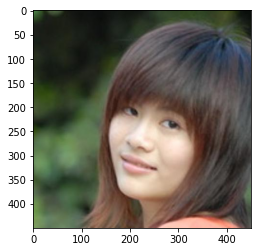

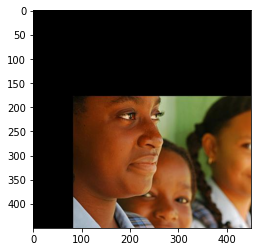

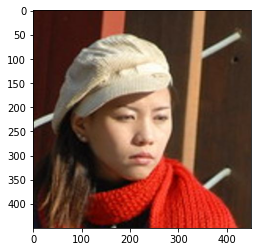

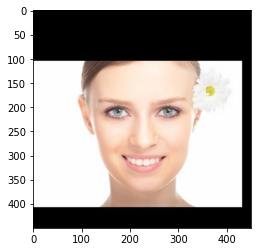

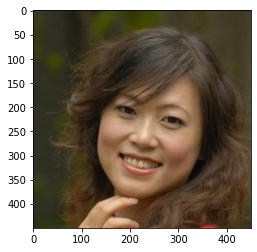

['/content/AFLW2000/image01765.jpg',
 '/content/AFLW2000/image02136.jpg',
 '/content/AFLW2000/image02083.jpg',
 '/content/AFLW2000/image00092.jpg',
 '/content/AFLW2000/image03812.jpg']

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# save all  names of images files  with 
#make sure the path (AFLW2000-3D)
imgs_pathes_list = glob.glob('/content/AFLW2000/*.jpg')

# loop through the list and show the image to certain image is red
for path in imgs_pathes_list[:5]:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # to convert BGR image to RGB because cv2 read images as BGR formate
    plt.imshow(image)
    plt.show()
    #cv2_imshow(image)
    
    

imgs_pathes_list[0:5]   

In [66]:
img_name = path.split('.jpg')[0]
print(img_name)

/content/AFLW2000/image03812


In [49]:
#to get name without extension
#img_name = path.split('.jpg')[0]
# add the .mat extension
#path_mat = img_name + '.mat'
random_file = 'image00053'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z 
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          face.landmark
          break
      

In [65]:
len(face.landmark)

468

In [67]:
#to extract landmarks  (468 3D face landmarks)
faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
all_featuresANDlabels=[]
#img_landmarks=[]
with faceModule.FaceMesh(static_image_mode=True) as faces:
   
    for path in imgs_pathes_list:
        img_landmarks=[] 
          # to load and read image
        image = cv2.imread(path)
        # processing the face to extract the landmark points (468 point) for each x,y,z 
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
          # looping over the faces in the image
          for face in results.multi_face_landmarks:
              for landmark in face.landmark:
                img_landmarks.extend([landmark.x, landmark.y])
              break #to take first face only
        #to get name without extension
        img_name = path.split('.jpg')[0]
        # add the .mat extension
        path_mat = img_name + '.mat'
        data = sio.loadmat(path_mat)
        labels = data['Pose_Para'][0][:3]#pitch,yaw,roll
        #img_landmarks.extend(labels)
        pitch = labels[0]
        yaw = labels[1]
        roll = labels[2]
        img_landmarks.extend([pitch,yaw,roll])
        all_featuresANDlabels.append(img_landmarks)  

                  

In [69]:
columns_name = [['x' + str(i),'y' + str(i)] for i in range(len(face.landmark))]
columns_name=np.array(columns_name)
x=columns_name.reshape(1,-1)[0].tolist()
x.extend(['pitch','yaw','roll'])
print(x)


['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34', 'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41', 'y41', 'x42', 'y42', 'x43', 'y43', 'x44', 'y44', 'x45', 'y45', 'x46', 'y46', 'x47', 'y47', 'x48', 'y48', 'x49', 'y49', 'x50', 'y50', 'x51', 'y51', 'x52', 'y52', 'x53', 'y53', 'x54', 'y54', 'x55', 'y55', 'x56', 'y56', 'x57', 'y57', 'x58', 'y58', 'x59', 'y59', 'x60', 'y60', 'x61', 'y61', 'x62', 'y62', 'x63', 'y63', 'x64', 'y64', 'x65', 'y65', 'x66', 'y66', 'x67', 'y67', 'x68', 'y68', 'x69', 'y69', 'x70', 'y70', 'x71', 'y71', 'x72', 'y72

In [71]:
df =pd.DataFrame(all_featuresANDlabels,columns = x)

df.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y464,x465,y465,x466,y466,x467,y467,pitch,yaw,roll
0,0.455846,0.682511,0.451418,0.612964,0.465593,0.636703,0.467747,0.547774,0.455371,0.593176,...,0.520938,0.550923,0.522492,0.680619,0.535997,0.694482,0.532132,-0.143834,0.312414,0.251424
1,0.558868,0.680297,0.595267,0.618865,0.557218,0.638499,0.561075,0.559266,0.598121,0.600722,...,0.516774,0.546697,0.520920,0.577915,0.515087,0.579063,0.507160,0.073007,-0.828845,-0.001389
2,0.517964,0.662495,0.534135,0.610693,0.518633,0.623581,0.517764,0.556209,0.537175,0.595364,...,0.510742,0.537353,0.514970,0.604676,0.496714,0.611131,0.489891,-0.225362,-0.377338,0.073399
3,0.506525,0.672756,0.504331,0.627818,0.505511,0.639638,0.486623,0.550764,0.503946,0.606592,...,0.487394,0.540639,0.492590,0.662890,0.462152,0.672664,0.457482,-0.263845,-0.010168,-0.025475
4,0.487260,0.672059,0.492736,0.614332,0.494086,0.633196,0.495096,0.544601,0.496769,0.593665,...,0.508549,0.560691,0.510911,0.679068,0.514767,0.692473,0.509632,-0.087293,0.119370,0.195801


In [72]:
len(df)

2000

In [73]:
len(imgs_pathes_list)

2000

In [77]:
x[0:936]

['x0',
 'y0',
 'x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'x9',
 'y9',
 'x10',
 'y10',
 'x11',
 'y11',
 'x12',
 'y12',
 'x13',
 'y13',
 'x14',
 'y14',
 'x15',
 'y15',
 'x16',
 'y16',
 'x17',
 'y17',
 'x18',
 'y18',
 'x19',
 'y19',
 'x20',
 'y20',
 'x21',
 'y21',
 'x22',
 'y22',
 'x23',
 'y23',
 'x24',
 'y24',
 'x25',
 'y25',
 'x26',
 'y26',
 'x27',
 'y27',
 'x28',
 'y28',
 'x29',
 'y29',
 'x30',
 'y30',
 'x31',
 'y31',
 'x32',
 'y32',
 'x33',
 'y33',
 'x34',
 'y34',
 'x35',
 'y35',
 'x36',
 'y36',
 'x37',
 'y37',
 'x38',
 'y38',
 'x39',
 'y39',
 'x40',
 'y40',
 'x41',
 'y41',
 'x42',
 'y42',
 'x43',
 'y43',
 'x44',
 'y44',
 'x45',
 'y45',
 'x46',
 'y46',
 'x47',
 'y47',
 'x48',
 'y48',
 'x49',
 'y49',
 'x50',
 'y50',
 'x51',
 'y51',
 'x52',
 'y52',
 'x53',
 'y53',
 'x54',
 'y54',
 'x55',
 'y55',
 'x56',
 'y56',
 'x57',
 'y57',
 'x58',
 'y58',
 'x59',
 'y59',
 'x60',
 'y60',
 'x61',
 'y61',
 'x62',
 'y62',
 'x63',
 'y6

In [78]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(df[x[0:936]], df[['pitch','yaw','roll']], test_size=0.2, random_state=42)
labels_train.head(5)

,pitch,yaw,roll
968,-0.489448,-0.081421,-0.014555
240,-0.129277,0.170301,-0.176782
819,-0.008225,-0.493907,-0.120416
692,-0.318635,0.430087,-0.147642
420,-0.137476,0.368632,0.236267


In [86]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 968 to 1126
Columns: 936 entries, x0 to y467
dtypes: float64(936)
memory usage: 11.4 MB


In [91]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(features_train.iloc[:, 0:500], labels_train['pitch'])
reg.score(features_train, labels_train['pitch'])


ValueError: ignored

In [ ]:
reg.predict(np.array([[3, 5]]))